In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving large_scale.zip to large_scale.zip
Saving large_scale-optimum.zip to large_scale-optimum.zip
Saving low-dimensional.zip to low-dimensional.zip
Saving low-dimensional-optimum.zip to low-dimensional-optimum.zip
User uploaded file "large_scale.zip" with length 201698 bytes
User uploaded file "large_scale-optimum.zip" with length 4337 bytes
User uploaded file "low-dimensional.zip" with length 2603 bytes
User uploaded file "low-dimensional-optimum.zip" with length 2145 bytes


In [4]:
!unzip large_scale.zip
!unzip large_scale-optimum.zip
!unzip low-dimensional.zip
!unzip low-dimensional-optimum.zip

Archive:  large_scale.zip
   creating: large_scale/
  inflating: large_scale/knapPI_1_10000_1000_1  
  inflating: large_scale/knapPI_1_1000_1000_1  
  inflating: large_scale/knapPI_1_100_1000_1  
  inflating: large_scale/knapPI_1_2000_1000_1  
  inflating: large_scale/knapPI_1_200_1000_1  
  inflating: large_scale/knapPI_1_5000_1000_1  
  inflating: large_scale/knapPI_1_500_1000_1  
  inflating: large_scale/knapPI_2_10000_1000_1  
  inflating: large_scale/knapPI_2_1000_1000_1  
  inflating: large_scale/knapPI_2_100_1000_1  
  inflating: large_scale/knapPI_2_2000_1000_1  
  inflating: large_scale/knapPI_2_200_1000_1  
  inflating: large_scale/knapPI_2_5000_1000_1  
  inflating: large_scale/knapPI_2_500_1000_1  
  inflating: large_scale/knapPI_3_10000_1000_1  
  inflating: large_scale/knapPI_3_1000_1000_1  
  inflating: large_scale/knapPI_3_100_1000_1  
  inflating: large_scale/knapPI_3_2000_1000_1  
  inflating: large_scale/knapPI_3_200_1000_1  
  inflating: large_scale/knapPI_3_5000_10

In [14]:
#importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join


In [15]:
#Function to import data from file in proper format
def import_data():
    
       #import data files
    ls_data= 'large_scale/'
    ls_optimum= 'large_scale-optimum/'
    ld_data= 'low-dimensional/'
    ld_optimum= 'low-dimensional-optimum/'

    #isfile returns true if file exists
    #listdir lists all the directories in the path
    #join joins one or more path intelligently
    ls_files = [f for f in listdir(ls_data) if isfile(join(ls_optimum, f))] 
    ld_files = [f for f in listdir(ld_data) if isfile(join(ld_optimum, f))]
    
    #create arrays to store D=datapoints, O=optimum values, M=maximum weights
    ls_D = []
    ls_O = []
    ls_M = []
    for filename in ls_files :
       #read data excluding last line (wich is the answer)
        x = pd.read_csv(ls_data + filename,names=['weight', 'price'], delimiter = ' ', header=None,error_bad_lines=False ) 
        max_w = x.iloc[0]['price']
        ls_M.append(max_w)
        ls_D.append(x.iloc[1:-1])
        y =  pd.read_csv(ls_optimum+filename,names=['optimal'], delimiter = ' ', header=None)
        ls_O.append(y.iloc[0]['optimal'])
        
    ld_D = []
    ld_O = []
    ld_M = []
    for filename in ld_files :
        #read data excluding last line (wich is the answer)
        x = pd.read_csv(ld_data+filename,names=['weight', 'price'], delimiter = ' ', header=None,error_bad_lines=False ) 
        max_w = x.iloc[0]['price']
        ld_M.append(max_w)
        ld_D.append(x.iloc[1:])
        y =  pd.read_csv(ld_optimum+filename,names=['optimal'], delimiter = ' ', header=None)
        ld_O.append(y.iloc[0]['optimal'])
    
    return ls_D, ls_O, ls_M, ld_D, ld_O, ld_M

In [16]:
#LS = data large scale, consists of hundreds of datatpoints
#LD = data low dimension, has less than 100 datapoints
LS_X, LS_Y, LS_W, LD_X, LD_Y, LD_W = import_data()

#select LD first to build up the model (faster execution)
data_w = LD_W[0] #maximum weight
data_x = LD_X[0] #datapoints
data_y = LD_Y[0] #optimum values
print("Data 1:")
print("Items given are:")
print(data_x)
print("Maximum Weight that Knapsack can contain:")
print(data_w)
print("Optimal Value is:")
print(data_y)


Data 1:
Items given are:
    weight  price
1       91     84
2       72     83
3       90     43
4       46      4
5       55     44
6        8      6
7       35     82
8       75     92
9       61     25
10      15     83
11      77     56
12      40     18
13      63     58
14      75     14
15      29     48
16      75     70
17      17     96
18      78     32
19      40     68
20      44     92
Maximum Weight that Knapsack can contain:
879
Optimal Value is:
1025


In [17]:
#generate a random solution by choosing items using values between 0 and 1
sol = np.random.random(len(data_x))
print("\nArray that represents a random solution:")
print(sol)

#discretization so solution array contains only 0 or 1 values
print("Discretization of random solution:")
print(np.round(sol).astype(bool))


#display info of selected items in a table
idx = np.arange(len(data_x))
idx = idx[np.round(sol).astype(bool)]
carried = data_x.iloc[idx]
print("\nTable of selected items based on the random solution generated")
sprint(carried)


Array that represents a random solution:
[0.39708263 0.22638583 0.21249439 0.98052321 0.41289627 0.93209991
 0.40519179 0.59266952 0.19146566 0.22326001 0.43214691 0.54042706
 0.35975461 0.81823031 0.74255157 0.02033408 0.90648919 0.65008974
 0.56354496 0.5038884 ]
Discretization of random solution:
[False False False  True False  True False  True False False False  True
 False  True  True False  True  True  True  True]

Table of selected items based on the random solution generated
    weight  price
4       46      4
6        8      6
8       75     92
12      40     18
14      75     14
15      29     48
17      17     96
18      78     32
19      40     68
20      44     92


In [18]:
#Fitness Function
def fit(sol, data, max_w) :
    #Discretization
    mask = np.round(sol).astype(bool)
    
    #decode
    idx = np.arange(len(data))
    idx = idx[mask]
    data_solution = data.iloc[idx] #arranges solution in a table to view

    
    #price 
    price = np.sum(data_solution['price'])
    weight = np.sum(data_solution['weight']) 
    if weight <= max_w:
        return price
    else :
        return 0


In [27]:
#Bat Class
class bat:
    def __init__(self, population, data, max_w, fmin, fmax, A, alpha, gamma):
        self.population = population #population
        self.data = data #data
        self.max_w = max_w #maximum weight
        self.fmin = fmin #minimim frequecy 
        self.fmax = fmax #maximum frequency
        self.A = A #loudness
        self.alpha = alpha #pulse frequency
        self.gamma = gamma #coefficent of pulse emission
        self.data_size = len(data)
        self.best_sol = None
        self.t = 1 #iteration 
        
        #to generate random values to bats
        self.init_x() 
        self.init_f() 
        self.init_v() 
        self.init_y() 
        self.init_r()
                
    def init_x (self): #to generate random positions for bats
        self.solutions =  np.random.random((self.population,self.data_size)) # (self.population * self.data_size) array of random numbers
        
    def init_f (self):#to generate random frequencies for bats
        self.f = np.random.uniform(self.fmin,self.fmax,self.population) #give uniform self.population no.of random numbers between fmin and fmax

    def init_v (self): #to generate random velocities for bats
        self.v = np.zeros((self.population, self.data_size)) #zero array of (self.population * self.data_size)

    def init_y (self):
        Y = np.zeros(len(self.solutions)) #zero array of self.solutions length
        for i,sol in enumerate(self.solutions) : 
            Y[i] = fit(sol,self.data, self.max_w)  #to find current solution
        
        self.Y = Y
 
    def init_r (self): #generate random pulse rates
        self.r = np.random.random(self.population)
        self.r0 = self.r
        
    
    def update_f(self): #to update frequency of bats
        self.fmin = np.min(self.f)
        self.fmax = np.max(self.f)
        betha = np.random.random(len(self.f))
        self.f = betha*(self.fmax-self.fmin) + self.fmin
    
    def update_v(self): #to update velocity of bats
        self.find_best_solution()
        r = (self.solutions - self.best_sol)
        rr = [r[i] * self.f[i] for i in range(len(r))] 
        
        self.v = self.v + rr
        self.normalize_v()
    
    def update_x(self): #update position of bats
        self.solutions += self.v
        self.normalize_solution()
        self.update_y()
        self.localsearch()
        self.update_y
        self.find_best_solution()
        
    def update_A(self): #update loudness
        self.A = self.A * self.alpha
    
    def update_r(self): #update pulse rate
        self.r = self.r0 * (1- np.exp(-self.gamma*self.t))
        self.t += 1
    
    def update_y(self): #to update the current solution
        Y = np.zeros(len(self.solutions))
        for i,sol in enumerate(self.solutions) : 
            Y[i] = fit(sol,self.data, self.max_w)
        self.Y = Y

    
    def find_best_solution(self): #to find best solution
        self.best_sol = self.solutions[np.argmax(self.Y)]
        
    def normalize_solution(self):  #to normalize the solution
#         self.solutions = np.absolute(self.solutions / (np.max(self.solutions) - np.min(self.solutions)))
        self.solutions[self.solutions > 1] = 1
        self.solutions[self.solutions < 0] = 0
        
    def normalize_v(self): 
        self.v = np.sin(self.v) #sin value of v
            
    def extract_solution(self):
        #Discretization
        mask = np.round(self.best_sol).astype(bool) #round off the solution

        #decode
        idx = np.arange(len(self.data))
        idx = idx[mask]
        data_solution = self.data.iloc[idx] 

        return data_solution
        
    def mutate(self,x):
        size = len(x)
        sizex = size//5
        idx = np.random.permutation(size)[:sizex]

        x[idx] = 1-x[idx]

        return x
    
    def localsearch(self): 
        idxm = np.where(self.Y == 0)
        cm = self.solutions[ idxm ]
        for i in range(len(cm)): 
            cm[i] = self.mutate(cm[i])
        
        self.solutions[idxm] = cm
        

In [28]:
# Bat Algorithm parameters 
fmin = 0
fmax = 1
A = 1
alpha = 0.98
gamma = 0.98
population = 75
epoch = 25 #generation


#Selecting DLD
data_w = LS_W[4] #maximum weight
data_x = LS_X[4] #datapoints
data_y = LS_Y[4] #optimum values
print("Data 2:")
print("Items given are:")
print(data_x)
print("Maximum Weight that Knapsack can contain:")
print(data_w)
print("Optimal Value is:")
print(data_y)


Data 2:
Items given are:
      weight  price
1         94    485
2        506    326
3        416    248
4        992    421
5        649    322
...      ...    ...
996      949    336
997       89    931
998      488    588
999      568    449
1000     526    566

[1000 rows x 2 columns]
Maximum Weight that Knapsack can contain:
5002
Optimal Value is:
54503


In [29]:
data_w = LD_W[8] #maximum weight
data_x = LD_X[8] #datapoints
data_y = LD_Y[8] #optimum values
print("Data 3:")
print("Items given are:")
print(data_x)
print("Maximum Weight that Knapsack can contain:")
print(data_w)
print("Optimal Value is:")
print(data_y)


Data 3:
Items given are:
   weight  price
1      33     15
2      24     20
3      36     17
4      37      8
5      12     31
Maximum Weight that Knapsack can contain:
80
Optimal Value is:
130


In [30]:
solution = []
acc = []
bat_behaviour = []
for loop in range(30):
    localSolution = []
    bats = bat(population,data_x,data_w,fmin,fmax,A,alpha,gamma)
    for i in range(epoch):
        bats.update_f()
        bats.update_v()
        bats.update_x()    
        bats.update_r()
        localSolution.append(np.max(bats.Y))
#         if (i==epoch-1):
    bat_behaviour.append(np.average(bats.Y))
    solution.append(sum(localSolution)/len(localSolution))
    acc.append((sum(localSolution)/len(localSolution))/data_y)
   
averageSolution = sum(solution)/len(solution)

Average accuracy of Data 3 equal to 51.615  %
with an average solution equal to 67.100  from  130


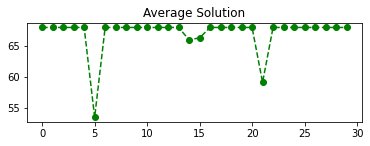

In [31]:
# plt.figure(figsize=(13,5))
plt.figure(1)
plt.subplot(211)
plt.plot(solution, "go--")
plt.title('Average Solution')
averageAcc = (sum(acc)/len(solution))*100
print ("Average accuracy of Data 3 equal to",'%.3f' % averageAcc, ' %')
print ("with an average solution equal to",'%.3f' % averageSolution, " from ", data_y)
# plt.show()



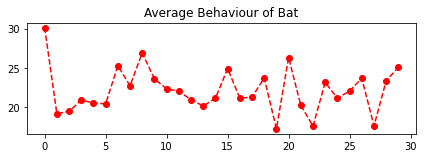

with an average behaviour of bat colony equal to 22.150


In [32]:
# plt.figure(figsize=(13,5))
plt.subplot(212)
plt.plot(bat_behaviour, "ro--")
plt.title('Average Behaviour of Bat')
plt.tight_layout()
plt.show()
print ("with an average behaviour of bat colony equal to",'%.3f' % np.average(bat_behaviour))